In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

df = pd.read_csv('earnings_train.csv')
df_predict = pd.read_csv('earnings_test_features.csv')

In [177]:
# Data quality checks for df
print("Data Types (df):")
print(df.dtypes)
print("\n")

print("Missing Data (including 0s) in df:")
missing_with_zeros = df.isnull().sum() + (df == 0).sum()
print(missing_with_zeros)

print("\n")

# Data quality checks for df_predict
print("Data Types (df_predict):")
print(df_predict.dtypes)
print("\n")

print("Missing Data (including 0s) in df_predict:")
missing_with_zeros_predict = df_predict.isnull().sum() + (df_predict == 0).sum()
print(missing_with_zeros_predict)


Data Types (df):
DISTRICT_TYPE          object
DISTRICT_NAME          object
DISTRICT_CODE         float64
ACADEMIC_YEAR          object
DEMO_CATEGORY          object
STUDENT_POPULATION     object
AWARD_CATEGORY         object
WAGE_YEAR1            float64
WAGE_YEAR2            float64
WAGE_YEAR3            float64
WAGE_YEAR4            float64
dtype: object


Missing Data (including 0s) in df:
DISTRICT_TYPE             0
DISTRICT_NAME             0
DISTRICT_CODE          2745
ACADEMIC_YEAR             0
DEMO_CATEGORY             0
STUDENT_POPULATION        0
AWARD_CATEGORY            0
WAGE_YEAR1            17770
WAGE_YEAR2            17770
WAGE_YEAR3            17770
WAGE_YEAR4            17770
dtype: int64


Data Types (df_predict):
DISTRICT_TYPE          object
DISTRICT_NAME          object
DISTRICT_CODE         float64
ACADEMIC_YEAR          object
DEMO_CATEGORY          object
STUDENT_POPULATION     object
AWARD_CATEGORY         object
WAGE_YEAR1            float64
WAGE_YEAR2    

In [178]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n feature: {col}")
    print(df[col].unique())


 feature: DISTRICT_TYPE
['School District' 'Legislative District' 'All']

 feature: DISTRICT_NAME
['Duarte Unified' 'Coronado Unified' 'Gilroy Unified' 'Pleasant Valley'
 'Senate District 15' 'Adelanto Elementary' 'Assembly District 56'
 'Klamath-Trinity Joint Unified' 'Modoc Joint Unified'
 'Healdsburg Unified' 'Kings County Office of Education'
 'Assembly District 11' 'Liberty Union High' 'Azusa Unified'
 'Benicia Unified' 'Konocti Unified' 'SBE - Vista Springs Charter'
 'Stone Corral Elementary' 'Santa Cruz County Office of Education'
 'Del Norte County Unified' 'Aromas - San Juan Unified'
 'Campbell Union High' 'Riverside County Office of Education'
 'SBE - Olive Grove Charter' 'Leggett Valley Unified' 'Delhi Unified'
 'Corning Union High' 'Marcum-Illinois Union Elementary'
 'Byron Union Elementary' 'Loleta Union Elementary' 'Pleasanton Unified'
 'Caruthers Unified' 'Emery Unified' 'Shandon Joint Unified'
 'Fresno County Office of Education' 'Buckeye Union Elementary'
 'Sierra Uni

In [179]:
df.describe()


,DISTRICT_CODE,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,WAGE_YEAR4
count,1.796000e+04,20705.000000,20705.000000,20705.000000,20705.000000
mean,3.041331e+06,4476.106834,6075.533253,7310.831635,8530.890413
std,1.583286e+06,11944.502346,16140.916903,19158.203471,22106.663179
min,1.100170e+05,0.000000,0.000000,0.000000,0.000000
25%,1.864089e+06,0.000000,0.000000,0.000000,0.000000
50%,3.166852e+06,0.000000,0.000000,0.000000,0.000000
75%,4.277214e+06,0.000000,0.000000,0.000000,0.000000
max,5.872769e+06,97993.000000,132847.000000,146728.000000,153910.000000


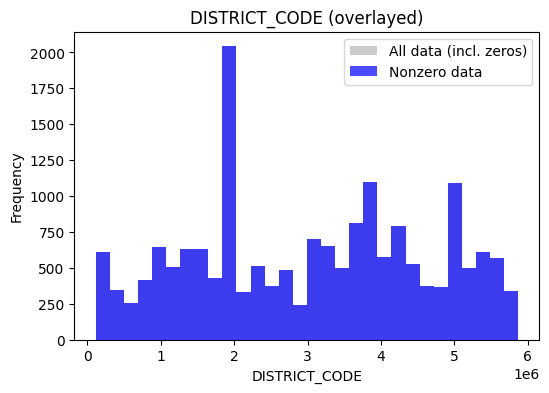

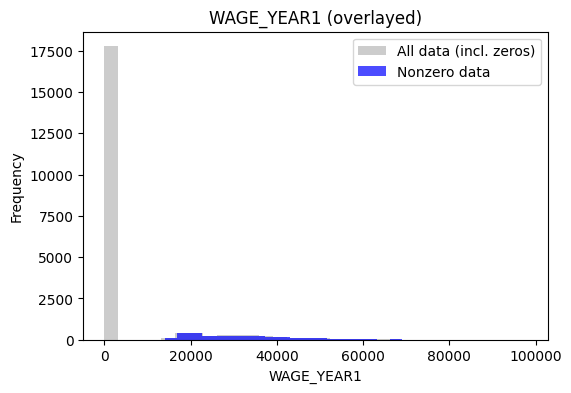

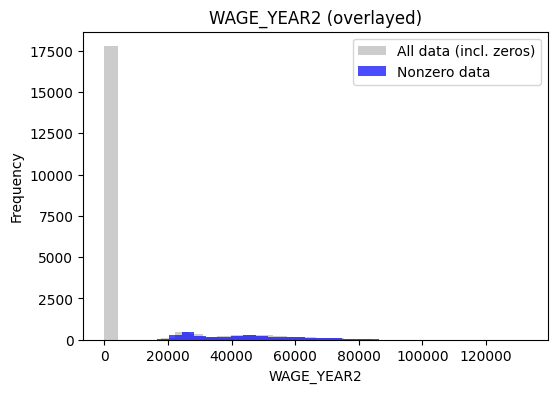

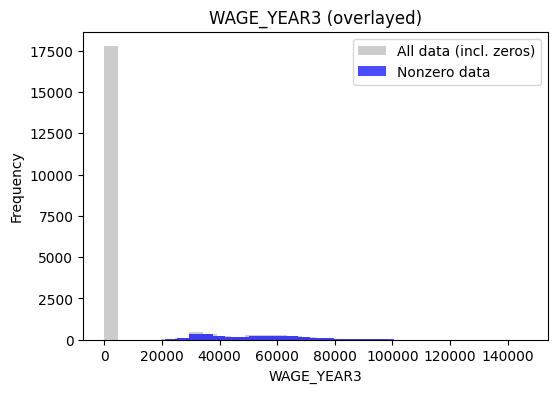

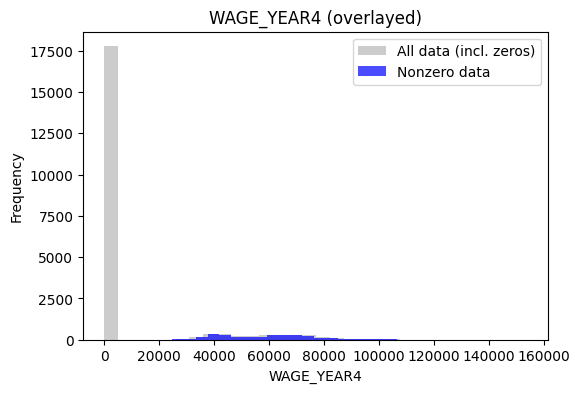

In [180]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    nonzero_data = df[df[col] != 0][col]
    full_data = df[col]

    if not nonzero_data.empty:
        plt.figure(figsize=(6, 4))

        #plot the full data histogram (with zeros)
        plt.hist(full_data, bins=30, color='gray', alpha=0.4, label='All data (incl. zeros)')

        #overlay nonzero only histogram in color
        plt.hist(nonzero_data, bins=30, color='blue', alpha=0.7, label='Nonzero data')

        plt.title(f"{col} (overlayed)")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()


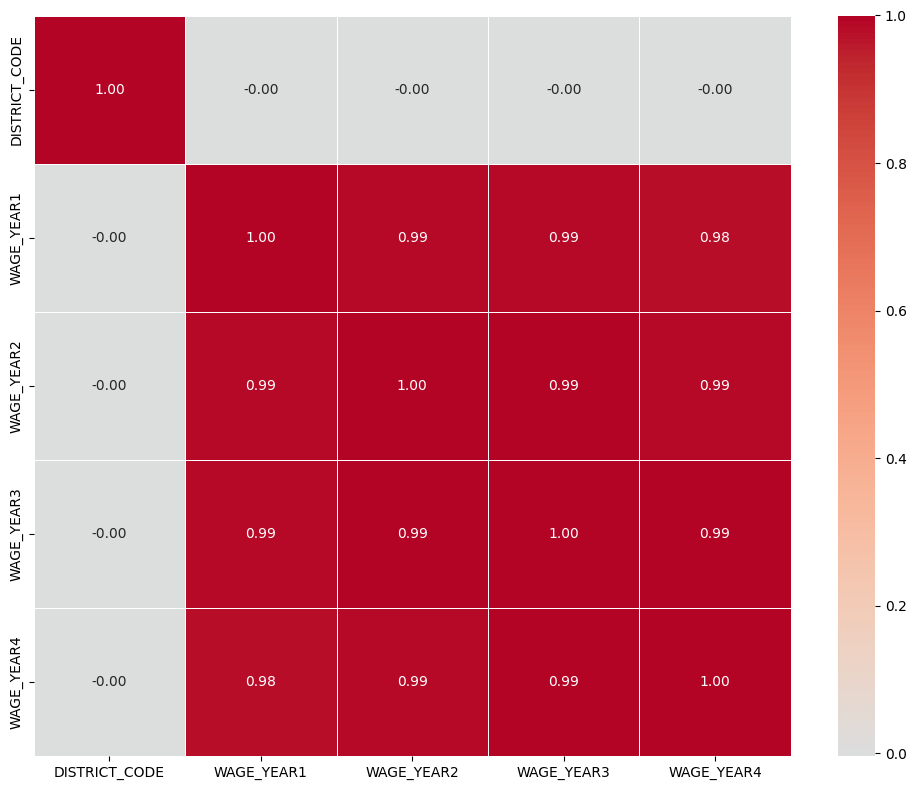

In [181]:
#makes correlation heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix, 
    annot=True,         
    cmap='coolwarm',    
    center=0,          
    fmt=".2f",         
    linewidths=0.5
)

plt.tight_layout()
plt.show()


/Users/ivantkachov/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/ivantkachov/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/ivantkachov/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/ivantkachov/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/ivantkachov/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/ivantkachov/L

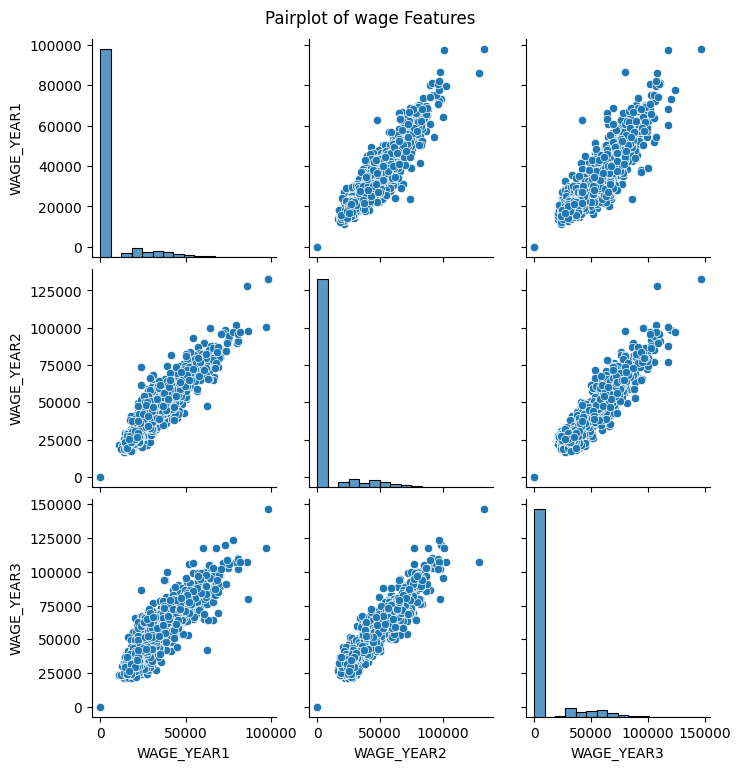

In [182]:
wage_cols = ['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']

train_data = df.copy()
train_labels = df[['WAGE_YEAR4']]

features_to_plot = ['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3']

#create subset
df_subset = train_data[features_to_plot]

#pairplot

sns.pairplot(df_subset, diag_kind='hist', palette='Set1')
plt.suptitle("Pairplot of wage Features", y=1.02)
plt.show()


In [183]:
#set up feature matrix and target vector
X = train_data.copy()
y = train_labels.values.ravel()

In [184]:
#define categorical and numeric columns
categorical_cols = ['DISTRICT_TYPE', 'DISTRICT_NAME', 'ACADEMIC_YEAR', 'DEMO_CATEGORY', 'STUDENT_POPULATION', 'AWARD_CATEGORY']
numeric_cols = ['DISTRICT_CODE', 'WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3']

In [185]:
#create preprocessing pipelines
numeric_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),                        
    StandardScaler()
)


preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])
#split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)




In [186]:
#create and train the model
model = make_pipeline(preprocessor, LinearRegression())

model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['DISTRICT_CODE',
                                                   'WAGE_YEAR1', 'WAGE_YEAR2',
                                                   'WAGE_YEAR3']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['DISTRICT_TYPE',
                                                   'DISTRICT_NAME',
                                                   'ACADEMIC_YEAR',
                                                   'DEMO_CATEGORY',
                                                   'STUDENT_POPULATION',
                                                   'AWARD_CATEGORY'])])),
                ('linearregression', LinearRegression())])

In [187]:
#cross validation 
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse = np.mean(np.sqrt(-scores))
print(f"CV RMSE: {rmse:.2f}")
print("\n")

#validation metrics
val_pred = model.predict(X_val)
mape = mean_absolute_percentage_error(y_val, val_pred) * 100
r2 = r2_score(y_val, val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, val_pred))

print(f"Validation RMSE: {rmse_val:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


CV RMSE: 2447.60


Validation RMSE: 2453.18
MAPE: 219002335533612171264.00%
R²: 0.9875


In [188]:

#tells us the weights of each feature
final_model = model.named_steps['linearregression']

weights = final_model.coef_

feature_names = model.named_steps['columntransformer'].get_feature_names_out()

coef_df = pd.DataFrame({
    'feature': feature_names,
    'weight': weights
}).sort_values(by='weight', ascending=False)

print(coef_df)


                                         feature        weight
3                                num__WAGE_YEAR3  19232.884259
539  cat__DISTRICT_NAME_San Ramon Valley Unified   5745.422992
536      cat__DISTRICT_NAME_San Mateo Union High   5076.953882
694         cat__DISTRICT_NAME_Yuba City Unified   4667.943124
190      cat__DISTRICT_NAME_Corona-Norco Unified   3881.989043
..                                           ...           ...
556         cat__DISTRICT_NAME_Senate District 1  -2235.067608
11        cat__DISTRICT_NAME_Albany City Unified  -2404.968139
211            cat__DISTRICT_NAME_Dublin Unified  -2430.420475
53        cat__DISTRICT_NAME_Assembly District 3  -3020.289792
37       cat__DISTRICT_NAME_Assembly District 15  -3377.742737

[718 rows x 2 columns]


In [189]:
test_data = df_predict.copy()

model.fit(X, y)
predictions = model.predict(test_data)
#sets all negative to 0
predictions = np.maximum(predictions, 0)
#sets to 2 decimal places
predictions = np.round(predictions, 2)

# Save predictions
pd.DataFrame(predictions).to_csv('preds.csv', index=False, header=False)
